Firefly Algorithm

Name : Dawwi Raissa Damarjati Muljana
SID : 1301213517

# Importing Library

In [1]:
#importing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Fungsi F14

In [2]:
def F14(x):
    aS = np.array([
        [-32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32],
        [-32, -32, -32, -32, -32, -16, -16, -16, -16, -16, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32]
    ])
    x = x.reshape(2, 1)
    bS = np.sum((x - aS) ** 6, axis=0)
    return (1 / 500 + np.sum(1 / (np.arange(1, 26) + bS))) ** -1

# Parameter 

In [3]:
# Parameter Firefly Algorithm
n = 100  # Jumlah kunang-kunang dalam 1 populasi
max_iter = 200 # Jumlah iterasi
alpha = 0.1  # Mengontrol parameter randomness dalam pegerakan kunang kunang
gamma = 1 # Seberapa terang cahaya/penyerapan cahaya antar kunang kunang
beta_init = 1  # Mengontrol seberapa tinggi daya tarik antar kunang kunang
lb, ub = -50, 100  # Batas bawah dan atas untuk posisi firefly
plot_lb, plot_ub = -100, 100  # Batas bawah dan atas untuk plot gambar

# Inisialisasi Populasi

In [4]:
np.random.seed(42) # Memastikan bilangan acak dapat di replikasi
positions = np.random.uniform(lb, ub, (n, 2)) # Menghasilkan array n*2 dengan range lb, ub
fitness = np.array([F14(firefly) for firefly in positions])

# Algoritma Firefly

In [5]:
# Simpan data untuk animasi
history = []
# Track the best solution found
best_position = None
best_fitness = np.inf 

In [6]:
def distance(x, y):
    return np.linalg.norm(x - y)

def firefly_algorithm():
    global positions, fitness, history, best_position, best_fitness
    for t in range(max_iter):
        history.append(positions.copy())
        for i in range(n):
            for j in range(n):
                if fitness[j] < fitness[i]:
                    r = distance(positions[i], positions[j])
                    beta = beta_init * np.exp(-gamma * r)
                    positions[i] = positions[i] + beta * (positions[j] - positions[i]) + alpha * (np.random.rand(2) - 0.5)
                    positions[i] = np.clip(positions[i], lb, ub)
                    fitness[i] = F14(positions[i])
                    
                    if fitness[i] < best_fitness:
                        best_fitness = fitness[i]
                        best_position = positions[i].copy()
                        print("NEW BEST", best_position)
    return positions

In [7]:
# Jalankan algoritma Firefly
positions = firefly_algorithm()
history.append(positions.copy())

NEW BEST [ 6.22797629 92.63465924]
NEW BEST [ 6.21682964 92.63127096]
NEW BEST [ 6.14730675 92.6264444 ]
NEW BEST [ 6.12840499 92.60896274]
NEW BEST [59.82516978 39.80490035]
NEW BEST [59.80708169 39.75782315]
NEW BEST [59.76022461 39.77146419]
NEW BEST [59.74166021 39.77232126]
NEW BEST [59.74633496 39.73050359]
NEW BEST [59.72531011 39.69662572]
NEW BEST [-26.62441042 -26.60811117]
NEW BEST [-26.65017263 -26.5987526 ]
NEW BEST [-4.35137451 28.67199949]
NEW BEST [-4.09138759 28.49307595]
NEW BEST [-3.80100461 28.26375453]
NEW BEST [-3.49687514 28.1242632 ]
NEW BEST [-3.26336594 28.0411898 ]
NEW BEST [-3.23645031 28.07343237]
NEW BEST [-3.21054154 28.10282176]
NEW BEST [-3.20101159 28.1524732 ]
NEW BEST [-3.15521342 28.1888372 ]
NEW BEST [-3.15471498 28.23284703]
NEW BEST [-3.11033533 28.24674174]
NEW BEST [-3.07779345 28.24984402]
NEW BEST [-3.08246667 28.29210453]
NEW BEST [-3.05996151 28.28514331]
NEW BEST [-3.03515252 28.29313434]
NEW BEST [-3.01711033 28.33733143]
NEW BEST [-3.041

# Visualisasi Plot hasil dan animasi

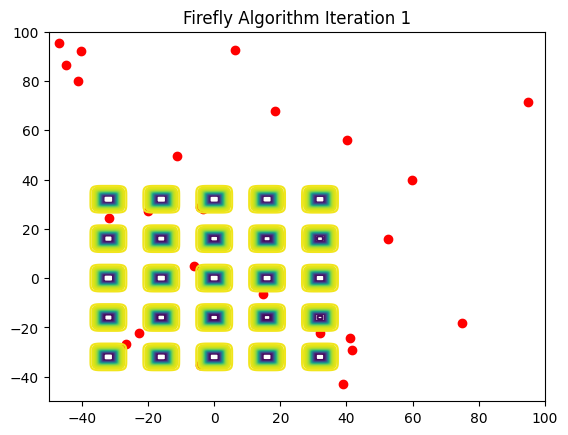

In [8]:

# Prepare contour plot data
X1 = np.linspace(plot_lb, plot_ub, 400)
X2 = np.linspace(plot_lb, plot_ub, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = np.array([F14(np.array([x1, x2])) for x1, x2 in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

# Set up the plot and axes for animation
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figsize for a square plot
ax.set_xlim(plot_lb, plot_ub)
ax.set_ylim(plot_lb, plot_ub)
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter([], [], c='red')  # Solution candidates

# Update function for animation
def update(frame):
    positions = history[frame]
    scatter.set_offsets(positions)
    ax.set_title(f'Firefly Algorithm Iteration {frame + 1}')
    return scatter,

ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)
plt.show()

# Genrating & Saving GIF

In [9]:
# Manage run count
run_count_file = 'run_count_gen0.txt'

# Read current run count
try:
    with open(run_count_file, 'r') as f:
        run_count = int(f.read().strip())
except FileNotFoundError:
    run_count = 0

# Increment run count
run_count += 1

# Save new run count
with open(run_count_file, 'w') as f:
    f.write(str(run_count))

# Save the animation as a GIF with incremented name
gif_filename = f'Firefly-Gen0.{run_count}..gif'
ani.save(gif_filename, writer=PillowWriter(fps=5))

plt.show()